In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Asisnero Waiba',
 'Sarbodaya Sherma',
 'Anjan Chakradhar',
 'Ram Bhaju',
 'Ayus Dumjan',
 'Chandra Chaguthee',
 'Gagan Bassi',
 'Ananta Ahbed',
 'Finjo Palanchoke',
 'Pralhad Rajbahndari']

In [7]:
total_customer = 200000
male_percent = 58

male = {'Name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'Name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['Gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['Gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'Gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'Gender'
] = 'Prefer not to say'

In [11]:
df.Gender.value_counts()

Male                 104456
Female                74308
Other                 13953
Prefer not to say      7283
Name: Gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['Email'] = df.Name.apply(email_gen)

In [14]:
df

,Name,Gender,Email
0,Manish Koti,Other,manish.koti@fakeemail.com
1,Kaushal Tuladahar,Male,kaushal.tuladahar@fakeemail.com
2,Sushil thapa Kafle,Male,sushil.thapa@fakeemail.com
3,Pradeep raj nepal Katel,Male,pradeep.raj@fakeemail.com
4,Dipak Raul,Male,dipak.raul@fakeemail.com
...,...,...,...
83995,Lune Bijukchen,Female,lune.bijukchen@fakeemail.com
83996,Mahima Gununge,Female,mahima.gununge@fakeemail.com
83997,Sajita Bata,Female,sajita.bata@fakeemail.com
83998,Sunita Chitrakr,Female,sunita.chitrakr@fakeemail.com


In [15]:
df['Phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,Name,Gender,Email,Phone
0,Manish Koti,Other,manish.koti@fakeemail.com,9841255187
1,Kaushal Tuladahar,Male,kaushal.tuladahar@fakeemail.com,9841119404
2,Sushil thapa Kafle,Male,sushil.thapa@fakeemail.com,9841180490
3,Pradeep raj nepal Katel,Male,pradeep.raj@fakeemail.com,9841401613
4,Dipak Raul,Male,dipak.raul@fakeemail.com,9841378836
...,...,...,...,...
83995,Lune Bijukchen,Female,lune.bijukchen@fakeemail.com,9841547816
83996,Mahima Gununge,Female,mahima.gununge@fakeemail.com,9841461009
83997,Sajita Bata,Female,sajita.bata@fakeemail.com,9841052181
83998,Sunita Chitrakr,Female,sunita.chitrakr@fakeemail.com,9841661825


In [17]:
df['Channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'Channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'Channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'Channel'
] = 'Other'

In [19]:
df

,Name,Gender,Email,Phone,Channel
0,Manish Koti,Other,manish.koti@fakeemail.com,9841255187,Other
1,Kaushal Tuladahar,Male,kaushal.tuladahar@fakeemail.com,9841119404,Other
2,Sushil thapa Kafle,Male,sushil.thapa@fakeemail.com,9841180490,Google Search
3,Pradeep raj nepal Katel,Male,pradeep.raj@fakeemail.com,9841401613,Word of Mouth
4,Dipak Raul,Male,dipak.raul@fakeemail.com,9841378836,Other
...,...,...,...,...,...
83995,Lune Bijukchen,Female,lune.bijukchen@fakeemail.com,9841547816,Google Search
83996,Mahima Gununge,Female,mahima.gununge@fakeemail.com,9841461009,Facebook/Ads
83997,Sajita Bata,Female,sajita.bata@fakeemail.com,9841052181,Facebook/Ads
83998,Sunita Chitrakr,Female,sunita.chitrakr@fakeemail.com,9841661825,Facebook/Ads


In [20]:
df.Channel.value_counts()

Facebook/Ads     76983
Google Search    54408
Other            35086
Word of Mouth    33523
Name: Channel, dtype: int64

In [21]:
df['First Contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'First Contact'
] = 'browser'

In [23]:
df

,Name,Gender,Email,Phone,Channel,First Contact
0,Manish Koti,Other,manish.koti@fakeemail.com,9841255187,Other,browser
1,Kaushal Tuladahar,Male,kaushal.tuladahar@fakeemail.com,9841119404,Other,browser
2,Sushil thapa Kafle,Male,sushil.thapa@fakeemail.com,9841180490,Google Search,browser
3,Pradeep raj nepal Katel,Male,pradeep.raj@fakeemail.com,9841401613,Word of Mouth,app
4,Dipak Raul,Male,dipak.raul@fakeemail.com,9841378836,Other,app
...,...,...,...,...,...,...
83995,Lune Bijukchen,Female,lune.bijukchen@fakeemail.com,9841547816,Google Search,browser
83996,Mahima Gununge,Female,mahima.gununge@fakeemail.com,9841461009,Facebook/Ads,browser
83997,Sajita Bata,Female,sajita.bata@fakeemail.com,9841052181,Facebook/Ads,browser
83998,Sunita Chitrakr,Female,sunita.chitrakr@fakeemail.com,9841661825,Facebook/Ads,browser


In [24]:
df['First Contact'].value_counts()

browser    171875
app         28125
Name: First Contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,Name,Gender,Email,Phone,Channel,First Contact
33562,Santoshi Banu,Female,santoshi.banu@fakeemail.com,9841835766,Facebook/Ads,browser
49846,Rasila Shrarma,Female,rasila.shrarma@fakeemail.com,9841576484,Other,browser
48796,Samita Karmachrya,Female,samita.karmachrya@fakeemail.com,9841664500,Other,app
77335,Reshma Desemaru,Female,reshma.desemaru@fakeemail.com,9841976426,Facebook/Ads,browser
96778,Aashish Lekhy,Male,aashish.lekhy@fakeemail.com,9841641912,Google Search,browser
...,...,...,...,...,...,...
52049,Ayush Nayabha,Male,ayush.nayabha@fakeemail.com,9841553887,Other,browser
34012,Amita Pathik,Female,amita.pathik@fakeemail.com,9841355612,Word of Mouth,browser
95214,Rohit Paluwa,Male,rohit.paluwa@fakeemail.com,9841466157,Facebook/Ads,browser
73751,Chhiring Dhoubanjara,Male,chhiring.dhoubanjara@fakeemail.com,9841229961,Google Search,browser


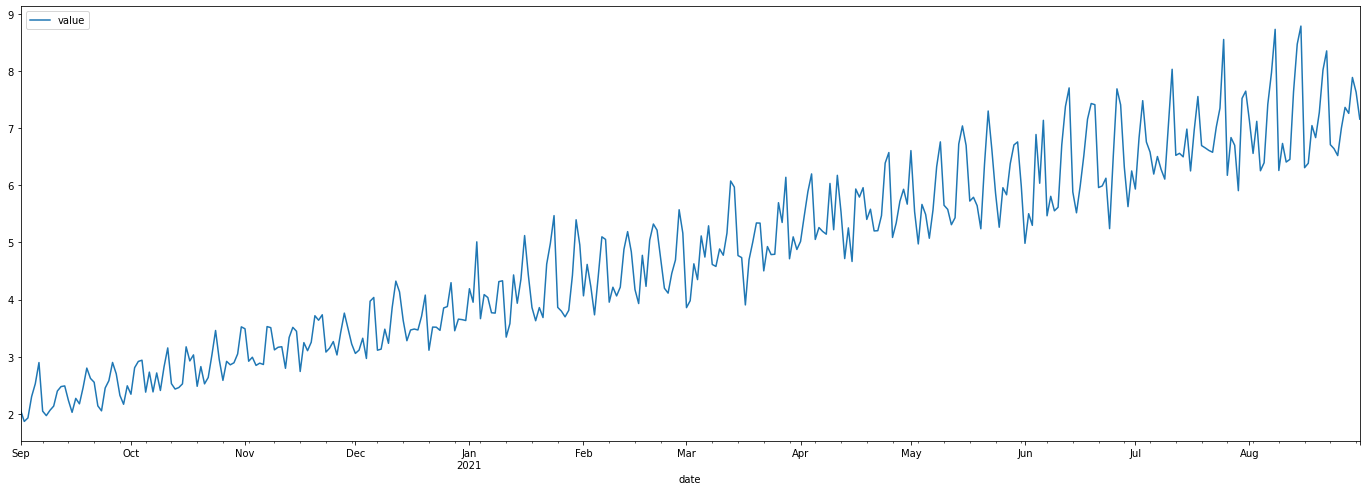

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (100*data.value).astype(int)

In [30]:
data.rows.sum()

176686

In [31]:
data

,date,base_amount,white_noise,my_linear_trend,weekend_boost_factor,total_factor,value,rows
0,2020-09-01,1.0,1.080762,2.000000,1.0,2.161524,2.161524,216
1,2020-09-02,1.0,1.094505,2.013699,1.0,2.204003,2.204003,220
2,2020-09-03,1.0,0.969676,2.027397,1.0,1.965919,1.965919,196
3,2020-09-04,1.0,0.896669,2.041096,1.1,2.013205,2.013205,201
4,2020-09-05,1.0,0.866527,2.054795,1.2,2.136642,2.136642,213
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,1.028872,6.931507,1.1,7.844795,7.844795,784
361,2021-08-28,1.0,0.902295,6.945205,1.2,7.519948,7.519948,751
362,2021-08-29,1.0,1.056229,6.958904,1.2,8.820234,8.820234,882
363,2021-08-30,1.0,0.971950,6.972603,1.0,6.777023,6.777023,677


In [32]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [33]:
final_dates = (data.apply(create_list, axis=1).sum())

In [34]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [35]:
clients['Created At'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_86027/3226454060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['Created At'] = final_dates


In [36]:
clients

,Name,Gender,Email,Phone,Channel,First Contact,Created At
0,Santoshi Banu,Female,santoshi.banu@fakeemail.com,9841835766,Facebook/Ads,browser,2020-09-01 00:00:00
1,Rasila Shrarma,Female,rasila.shrarma@fakeemail.com,9841576484,Other,browser,2020-09-01 00:00:00
2,Samita Karmachrya,Female,samita.karmachrya@fakeemail.com,9841664500,Other,app,2020-09-01 00:00:00
3,Reshma Desemaru,Female,reshma.desemaru@fakeemail.com,9841976426,Facebook/Ads,browser,2020-09-01 00:00:00
4,Aashish Lekhy,Male,aashish.lekhy@fakeemail.com,9841641912,Google Search,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
176681,Nikkon Dewan,Male,nikkon.dewan@fakeemail.com,9841316938,Facebook/Ads,browser,2021-08-31 00:00:00
176682,Shekhar Bishunkhe,Male,shekhar.bishunkhe@fakeemail.com,9841812087,Facebook/Ads,browser,2021-08-31 00:00:00
176683,Shambhav Deula,Female,shambhav.deula@fakeemail.com,9841318019,Word of Mouth,browser,2021-08-31 00:00:00
176684,Dipesh Mansoor,Male,dipesh.mansoor@fakeemail.com,9841819533,Word of Mouth,browser,2021-08-31 00:00:00


In [37]:
clients.Gender.value_counts()

Male                 92130
Female               65783
Other                12352
Prefer not to say     6421
Name: Gender, dtype: int64

In [38]:
clients.Channel.value_counts()

Facebook/Ads     68035
Google Search    48015
Other            31132
Word of Mouth    29504
Name: Channel, dtype: int64

In [39]:
clients['First Contact'].value_counts()

browser    151853
app         24833
Name: First Contact, dtype: int64